#### Import numpy, matplotlib.pyplot

In [195]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Reading RegData csv file into numpy array 
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [196]:
df = pd.read_csv('RegData.csv')
df

,2.900000095,4
0,6.7,7.4
1,4.9,5.0
2,7.9,7.2
3,9.8,7.9
4,6.9,6.1
5,6.1,6.0
6,6.2,5.8
7,6.0,5.2
8,5.1,4.2
9,4.7,4.0


#### Exploring  Data

In [197]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2.900000095  12 non-null     float64
 1   4            12 non-null     float64
dtypes: float64(2)
memory usage: 324.0 bytes
None
       2.900000095          4
count    12.000000  12.000000
mean      6.208333   5.700000
std       1.513250   1.281335
min       4.400000   4.000000
25%       5.050000   4.850000
50%       6.050000   5.500000
75%       6.750000   6.375000
max       9.800000   7.900000


#### Defining variables X and y , Assigning first column data to X and second column to y


In [198]:
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values


In [199]:
X

array([6.69999981, 4.9000001 , 7.9000001 , 9.80000019, 6.9000001 ,
       6.0999999 , 6.19999981, 6.        , 5.0999999 , 4.69999981,
       4.4000001 , 5.80000019])

In [200]:
Y

array([7.4000001 , 5.        , 7.19999981, 7.9000001 , 6.0999999 ,
       6.        , 5.80000019, 5.19999981, 4.19999981, 4.        ,
       4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

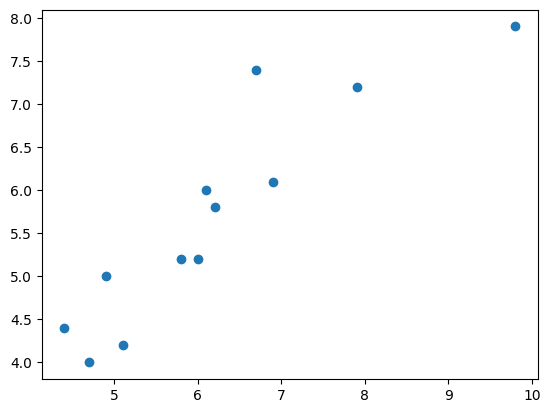

In [201]:
plt.scatter(X, Y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

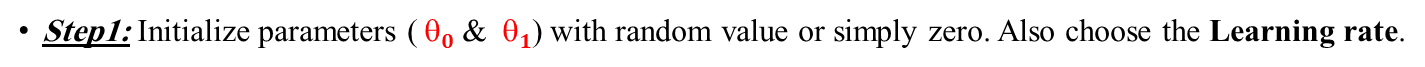

In [202]:
theta_0 = 0
theta_1 = 0
alpha = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.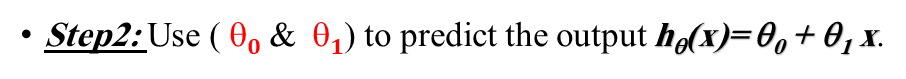
#### Note: you will need to iterate through all data points

In [203]:
y_pred = []
for i in X:
    hypothesis = theta_0 + theta_1 * i
    y_pred.append(hypothesis)
print(y_pred)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).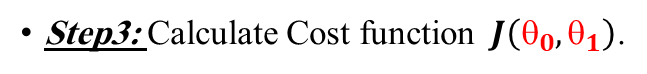
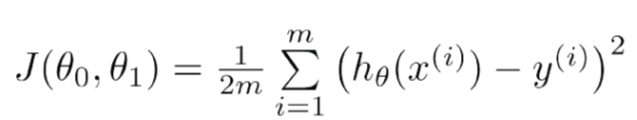

In [204]:
J =0
for i in range(len(y_pred)):
    J += (y_pred[i] - Y[i])**2
J /= (2*len(y_pred))
print("J = ", J)


J =  16.99749985300001


### Step4: Calculate the gradient.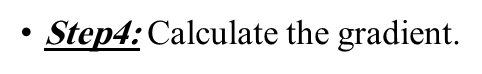
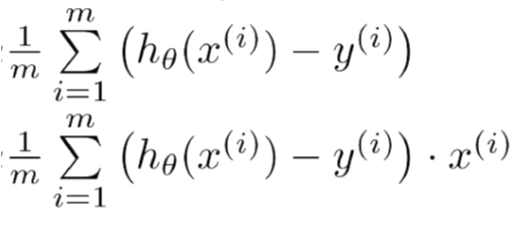

In [205]:
gradient_zero = 0
gradient_one = 0
for i in range (len(y_pred)):
    gradient_zero += ((y_pred[i] - Y[i]))
    gradient_one += ((y_pred[i] - Y[i])* X[i])
    #gradient_zero += gradient_0 
    #gradient_one += gradient_1
gradient_zero /= len(X)
gradient_one /= len(X)
print(gradient_zero, gradient_one)


-5.6999999680833335 -36.99749984848332


### Step5: Update the parameters (simultaneously).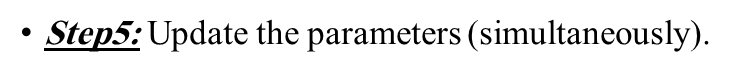
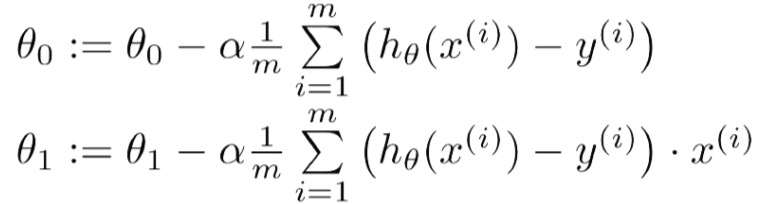

In [206]:
theta0_new = theta_0 - alpha * gradient_zero
theta1_new = theta_1 - alpha * gradient_one
print(theta0_new, theta1_new)

0.0005699999968083334 0.0036997499848483322


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.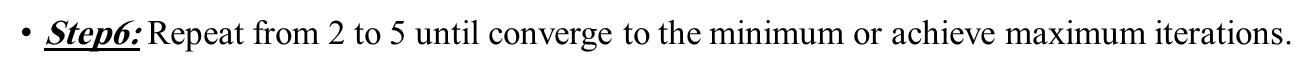

In [207]:
Convergence = 1e-6
while abs(gradient_zero) > Convergence or abs(gradient_one) > Convergence:
    y_pred = []
    for i in X:
        hypothesis = theta0_new + theta1_new * i
        y_pred.append(hypothesis)
    J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
    gradient_zero = (1/ len(X)) * np.sum((y_pred - Y))
    gradient_one = (1/ len(X)) * np.sum((y_pred - Y)* X) 
    theta0_new = theta0_new - alpha * gradient_zero
    theta1_new = theta1_new - alpha * gradient_one
print(gradient_zero , gradient_one)
print(theta0_new, theta1_new)

-9.999990127074199e-07 1.5294447948862217e-07
0.9382110568314436 0.7669993951122428


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [208]:
X

array([6.69999981, 4.9000001 , 7.9000001 , 9.80000019, 6.9000001 ,
       6.0999999 , 6.19999981, 6.        , 5.0999999 , 4.69999981,
       4.4000001 , 5.80000019])

In [209]:
y_pred = theta0_new + theta1_new * X
y_pred

array([6.07710686, 4.69650817, 6.99750635, 8.45480528, 6.23050696,
       5.61690729, 5.69360716, 5.54020743, 4.8499079 , 4.54310807,
       4.31300847, 5.38680769])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

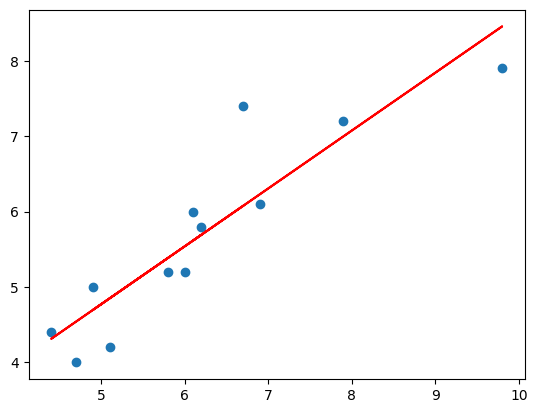

In [210]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

#### Use R2 score to evaluate LR equation output
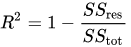
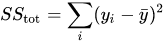
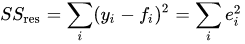
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [211]:
SSres = np.sum((Y - y_pred)**2)
SStot = np.sum((Y - np.mean(Y))**2)
R2 = 1 - (SSres/SStot)
print("R2 = " , R2*100, "%")

R2 =  82.05077248384379 %


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [212]:
Convergence = 1e-6
while abs(gradient_0) > Convergence and abs(gradient_1) > Convergence:
    hypo = theta0_new + theta1_new * X
    J = (1/(2*len(X))) * np.sum((hypo - Y)**2)
    gradient_0 = (1/ len(X)) * np.sum((hypo - Y))
    gradient_1 = (1/ len(X)) * np.sum((hypo - Y)* X) 
    theta0_new -= alpha * gradient_0
    theta1_new -= alpha * gradient_1
print(gradient_0 , gradient_1)
print(theta0_new, theta1_new)

-9.999779447452302e-07 1.5294125723282664e-07
0.9382110568314436 0.7669993951122428


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [213]:
hypo = theta0_new + theta1_new * X
hypo

array([6.07710686, 4.69650817, 6.99750635, 8.45480528, 6.23050696,
       5.61690729, 5.69360716, 5.54020743, 4.8499079 , 4.54310807,
       4.31300847, 5.38680769])

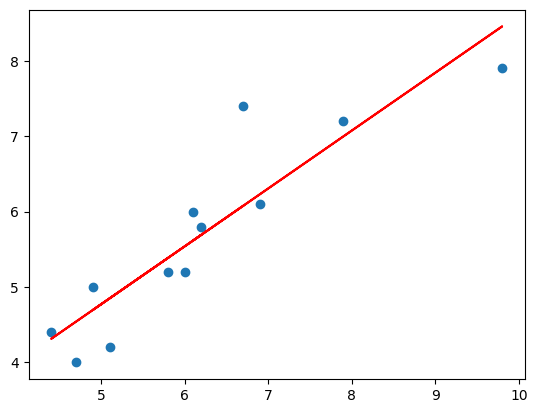

In [214]:
plt.scatter(X, Y)
plt.plot(X, hypo, color='red')

In [215]:
R2 = 1 - (np.sum((Y - hypo)**2)/np.sum((Y - np.mean(Y))**2))
print("R2 = " , R2*100, "%")

R2 =  82.05077248384379 %


## Plot loss function
### Repeat last vectorized implementaion version and save loss for each iteration (epoch)

In [216]:
Convergence = 1e-6
gradient_0 = 1
gradient_1 = 1
theta0_new = 0
theta1_new = 0
alpha = 0.01
loss = []
epoch = 0
while abs(gradient_0) > Convergence or abs(gradient_1) > Convergence:
    hypo = theta0_new + theta1_new * X
    J = (1/(2*len(X))) * np.sum((hypo - Y)**2)
    loss.append(J)
    gradient_0 = (1/ len(X)) * np.sum((hypo - Y))
    gradient_1 = (1/ len(X)) * np.sum((hypo - Y)* X) 
    theta0_new -= alpha * gradient_0
    theta1_new -= alpha * gradient_1
    epoch += 1
print(gradient_0 , gradient_1)
print(theta0_new, theta1_new)
print("Epoch = ", epoch)
print("Loss : " , loss)

-9.999779447452302e-07 1.5294125723282664e-07
0.9382110671486686 0.7669993935342786
Epoch =  21016
Loss :  [np.float64(16.997499853000008), np.float64(5.89860248950333), np.float64(2.1122128385265393), np.float64(0.8204784741969695), np.float64(0.37979347588594453), np.float64(0.22944319657479434), np.float64(0.17814035051734112), np.float64(0.16062745623556623), np.float64(0.15464198397663484), np.float64(0.15258909219516634), np.float64(0.15187780767726694), np.float64(0.15162422228465755), np.float64(0.15152679155839155), np.float64(0.1514826438727171), np.float64(0.15145668465607393), np.float64(0.15143694141656677), np.float64(0.15141932973850758), np.float64(0.15140245621615717), np.float64(0.15138584547935405), np.float64(0.15136933534494115), np.float64(0.15135287047323048), np.float64(0.1513364319740963), np.float64(0.1513200133921584), np.float64(0.1513036125141503), np.float64(0.15128722857400936), np.float64(0.15127086129939615), np.float64(0.1512545105864166), np.float64(0

### Plot loss vs. iterations

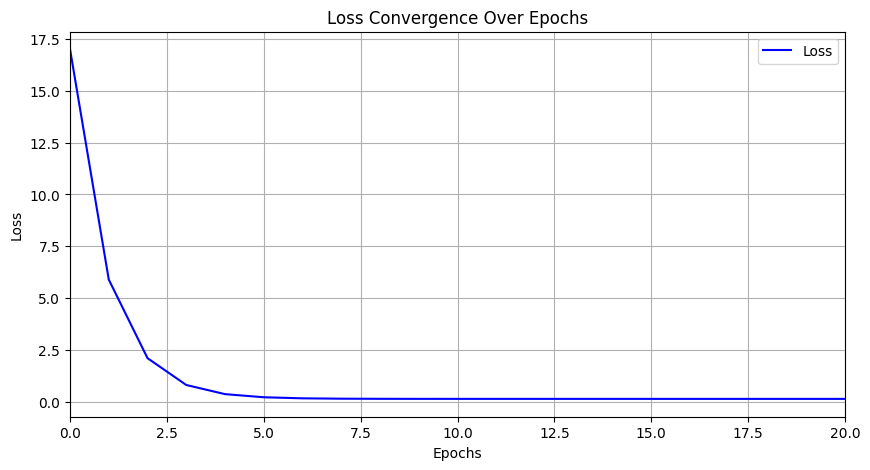

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(range(epoch), loss, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.xlim(0,20)
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()



## Multivariate LR

#### Read MultipleLR csv file into numpy array 
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [218]:
df1 = pd.read_csv('mlr02.csv')
df1

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      11 non-null     int64
 1   X2      11 non-null     int64
 2   X3      11 non-null     int64
dtypes: int64(3)
memory usage: 396.0 bytes


In [220]:
df1.describe()

,X1,X2,X3
count,11.000000,11.000000,11.000000
mean,150.090909,62.454545,195.000000
std,13.626845,9.114424,17.314734
min,128.000000,46.000000,167.000000
25%,140.000000,56.500000,186.000000
50%,153.000000,64.000000,194.000000
75%,160.500000,69.500000,209.000000
max,168.000000,74.000000,220.000000


In [221]:
df1.shape

(11, 3)

In [222]:
Y = df1.iloc[:, 0].values
X1 = df1.iloc[:, 1].values
X2 = df1.iloc[:, 2].values

### Repeat implementation but for more than one variable

In [223]:
X = df1[['X2', 'X3']].values
Y = df1['X1'].values
X_mean = np.mean(X , axis=0)
x_std = np.std(X,axis=0)
X = (X-X_mean) / x_std
X = np.c_[np.ones(X.shape[0]), X] 
Convergence = 1e-6
theta = np.zeros(X.shape[1])
alpha1 = 0.01
loss1 = []
epoch1 = 0
gradients = np.ones(X.shape[1])
while np.any(np.abs(gradients) > Convergence):
    hypo = X @ theta 
    J = (1/(2*len(X1))) * np.sum((hypo - Y)**2)
    loss1.append(J)
    gradients = (1 / len(Y)) * X.T @ (hypo - Y) 
    
    theta -= alpha1 * gradients
    epoch1 += 1

print("Gradient = ",gradients) 
print("Theta = ",theta)
print("Epoch = ", epoch1)
print("Loss = ", loss1[-1])

Gradient =  [-1.37978518e-12 -9.99788576e-07  9.99788570e-07]
Theta =  [150.09090909   7.48590117   5.52819251]
Epoch =  20153
Loss =  1.9542192174888993


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [224]:
H = X @ theta
print(Y)
print(H)

[132 143 153 162 154 168 137 149 159 128 166]
[133.71830536 143.43165675 153.67156039 164.53266114 151.75704336
 168.40781657 140.46403525 146.49392314 156.30191942 126.54066811
 165.6804105 ]


### Plot loss vs. iterations

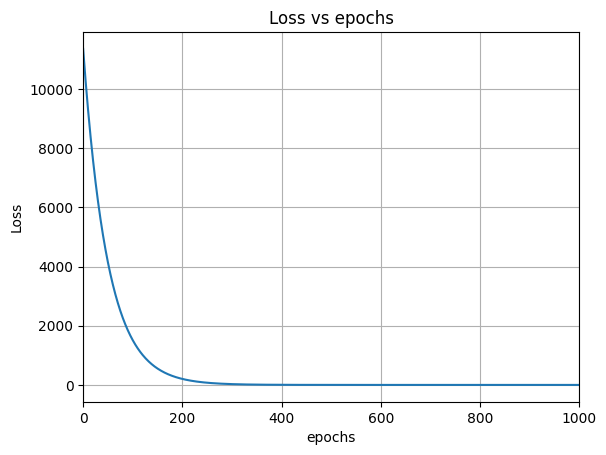

In [225]:
plt.plot(loss1)
plt.xlabel("epochs")
plt.xlim(0,1000)
plt.ylabel("Loss")
plt.title("Loss vs epochs")
plt.grid(True)

#### Use R2 score to evaluate LR equation output

In [226]:
R2 = 1 - (np.sum((Y - H)**2)/np.sum((Y - np.mean(Y))**2))
print("R2 = " , R2*100, "%")

R2 =  97.68471041499897 %



## LR Using sklearn

### Single Variable

#### Building a LR model usin linearmodel.LinearRegression() from sklearn library

In [227]:
%pip install scikit-learn
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error 

In [229]:
LR = LinearRegression()

In [230]:
df

,2.900000095,4
0,6.7,7.4
1,4.9,5.0
2,7.9,7.2
3,9.8,7.9
4,6.9,6.1
5,6.1,6.0
6,6.2,5.8
7,6.0,5.2
8,5.1,4.2
9,4.7,4.0


#### Training the model (fit the model to the training data)

In [231]:
X8 = df.iloc[:,0]
Y8 = df.iloc[:,1]

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X8, Y8, test_size=0.2, random_state=0)

In [233]:
LR.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

#### Predict y values using the trained model

In [234]:
y_pred = LR.predict(X8.values.reshape(-1, 1))

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

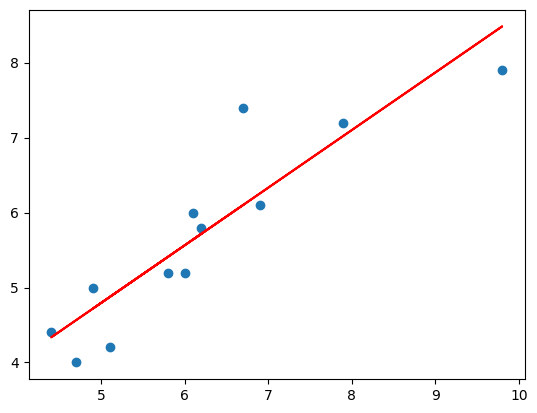

In [235]:
plt.scatter(X8, Y8)
plt.plot(X8, y_pred, color='red')

#### Use R2 score to evaluate model output

In [236]:
print("Mean Squared Error : ", mean_squared_error(Y8, y_pred))
print("Mean Absolute Error : ", mean_absolute_error(Y8, y_pred))
print("R2 Score : ", r2_score(Y8, y_pred)*100, "%")

Mean Squared Error :  0.27068796272349654
Mean Absolute Error :  0.4010431649844007
R2 Score :  82.01408969034318 %


### Repeat for Mulivariate

In [237]:
df1

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [238]:
LR1 = LinearRegression()

In [239]:
X_1 = df1.iloc[:, 1:].values
Y_1 = df1.iloc[:, 0].values

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=0)

In [241]:
LR1.fit(X_train, Y_train)


LinearRegression()

In [242]:
y_pred1 = LR1.predict(X_1)


In [243]:
print("Mean Squared Error : ", mean_squared_error(Y_1, y_pred1))
print("Mean Absolute Error : ", mean_absolute_error(Y_1, y_pred1))
print("R2 Score : ", r2_score(Y_1, y_pred1)*100, "%")

Mean Squared Error :  4.327488346357071
Mean Absolute Error :  1.7247255863443136
R2 Score :  97.43647268232054 %
